# MATH 210/215 20M - Project 2

* Wen Shan, Li 
* Serena Khatwa 
* Jennifer Tanojo 

*Taken From the project's document:*
# Mechanical Light Switch

A classic mechanical light switch consists of a lever with a supported fulcrum in the middle and a spring at one end. The spring is long enough that it must be compressed when the switch is straight upright. In this problem, we will analyze the motion of the switch when a force is applied.

## Model Equations and Parameters
Using the diagram given at the end of the document, we can derive the equation of motion for the angle of the switch:

$$
I \theta '' = - \mu \theta ' + \tau (\theta) + \tau_{app}
$$
where
$$
\tau(\theta) = - \frac{k}{l(\theta)}(l(\theta) - l_0)R(R + d)\sin(\theta)
$$
where $I$ is the moment of inertia of the switch lever, $\mu$ is the damping coefficient of the lever during rotation, $k$ is the spring constant,
$$
l(\theta) = ((R\sin(\theta))^2 + \left( R\cos(\theta) - (R + d))^2 \right) ^{1/2}
$$
is the length of the spring when the lever is at an angle $\theta, l_0$ is the rest length of the spring, $R$ is the distance from the pivot on the lever to the attachment point of the spring, $d$ is the length of the spring when the lever is upright and $\tau_{app}$ is the torque associated with an applied force.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
I = 5*(10)**(-7)
R = 5*(10)**(-2)
mu = (10)**(-4)
k = 1
d = 5*(10)**(-3)
l0 = 0.025

l = lambda theta: ((R*np.sin(theta))**2 + (R*np.cos(theta) - (R + d))**2)**(0.5)

tau = lambda theta: -k/l(theta)*(l(theta) - l0)*R*(R + d)*np.sin(theta)

## Plot of the Torque Function $\tau(\theta)$ for $\theta \in (-\pi, \pi)$

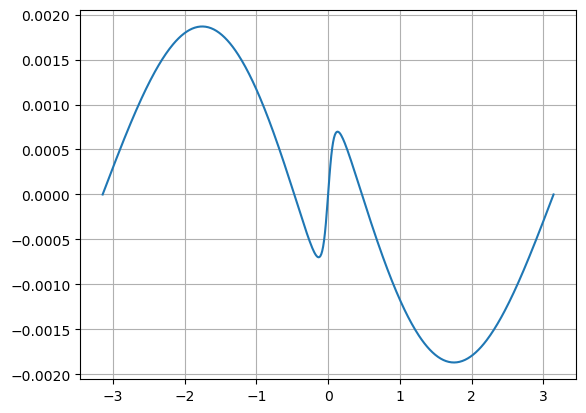

In [3]:
theta = np.linspace(-np.pi, np.pi, 500)
tauTheta = tau(theta)
plt.plot(theta, tauTheta), plt.grid(True)
plt.show()

To better observe the steady states, we can plot $\tau(\theta)$ in different ranges as well:

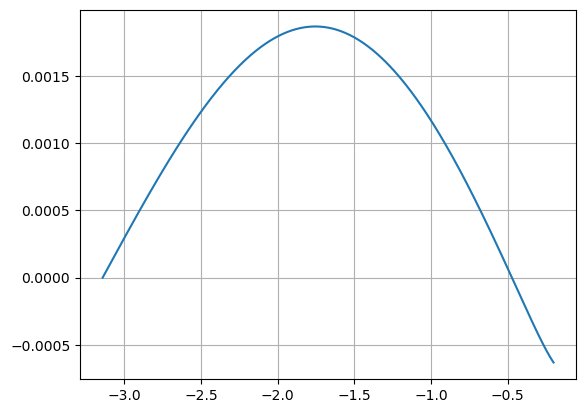

In [4]:
theta = np.linspace(-np.pi, -0.2, 500)
tauTheta = tau(theta)
plt.plot(theta, tauTheta), plt.grid(True)
plt.show()

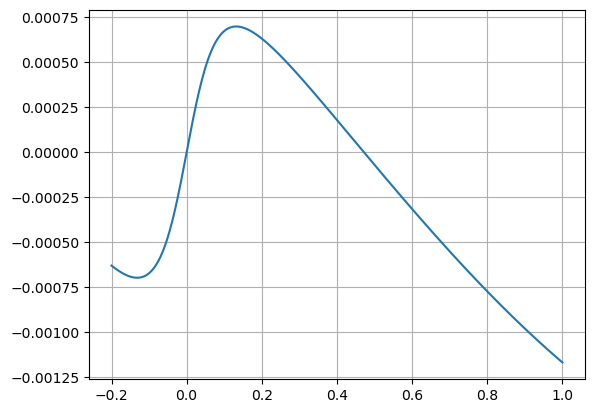

In [5]:
theta = np.linspace(-0.2, 1, 500)
tauTheta = tau(theta)
plt.plot(theta, tauTheta), plt.grid(True)
plt.show()

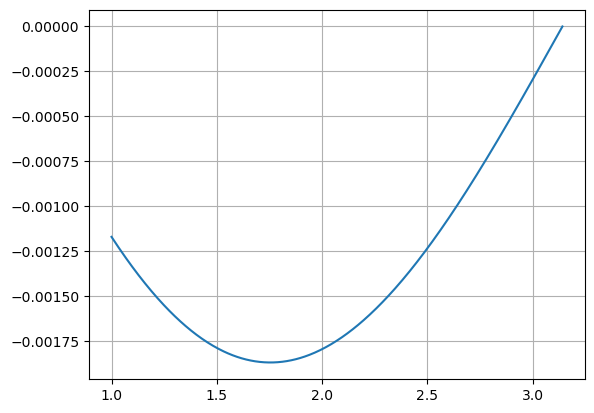

In [6]:
theta = np.linspace(1, np.pi, 500)
tauTheta = tau(theta)
plt.plot(theta, tauTheta), plt.grid(True)
plt.show()

## Approximating the Steady States

Since the derivatives are complicated to compute, we can choose to utilise the Secant method.

In [7]:
def secant(f,a,b,N):
    an = a
    bn = b
    sn = an - f(an)*(bn - an)/(f(bn) - f(an))
    for n in range(N):
        if f(an)*f(sn) < 0:
            bn = sn
            sn = an - f(an)*(bn - an)/(f(bn) - f(an))
        elif f(sn)*f(bn) < 0:
            an = sn
            sn = an - f(an)*(bn - an)/(f(bn) - f(an))
        elif f(sn) == 0:
            return sn
    return sn

Supposing that there is no applied torque $\tau_{app} = 0$, we can see from the plot that there are 5 steady state solutions and where they are approximately located. Using the Secant method to approximate the steady states:

Approximation for the first root:

In [8]:
# root 1
a1 = -3.5
b1 = -3
root1 = secant(tau, a1, b1, 100)
print("The first steady state:", root1)

The first steady state: -3.141592653589793


Approximation for the second steady state:

In [9]:
# root 2
a2 = -0.3
b2 = -0.8
root2 = secant(tau, a2, b2, 100)
print("The first steady state:", root2)

The first steady state: -0.4714534680987935


Approximation for the third steady state:

In [10]:
# root 3
a3 = -0.1
b3 = 0.1
root3 = secant(tau, a3, b3, 100)
print("The first steady state:", root3)

The first steady state: 0.0


Approximation for the fourth steady state:

In [11]:
# root 4
a4 = 0.2
b4 = 0.7
root4 = secant(tau, a4, b4, 100)
print("The first steady state:", root4)

The first steady state: 0.4714534680987935


Approximation for the fifth steady state:

In [12]:
# root 5
a5 = 3
b5 = 3.5
root5 = secant(tau, a5, b5, 100)
print("The first steady state:", root5)

The first steady state: 3.141592653589793


## Approximating the Solution using Euler's Method

We use the Euler's metod to approximate the solution that starts with initial values $\theta(0) = 0.001$ and $\theta ' (0) = 0$ and assuming that there is no applied torque $\tau_{app} = 0$. We compute the approximate solution for long enough (about 1s), so that it is very close to whatever steady state it is heading towards.

We use the step size $h = \frac{t_f}{N}$ small enough to compute an accurate approximation and plot the result:

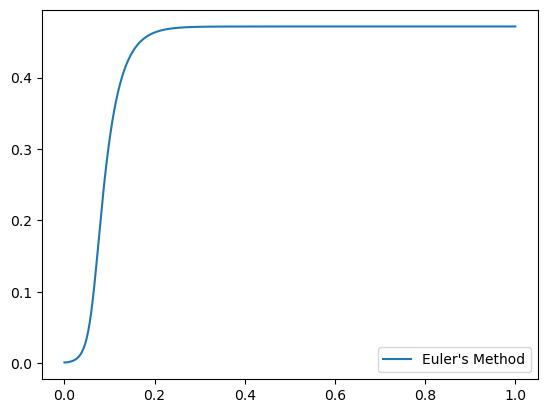

In [13]:
t0 = 0
tf = 1
N = 2000

t = np.linspace(t0,tf,N)
theta = np.zeros(len(t))
theta[0] = 0.001 # Initial value theta(0)
dtheta = np.zeros(len(t))
dtheta[0] = 0 # Initial value theta'(0)
f = lambda t, theta, dtheta: (-mu*dtheta + tau(theta))/I # Function for y'' = f(t,y,y')
for n in range(len(t)-1):
    theta[n+1] = theta[n] + dtheta[n]*(t[n+1] - t[n])
    dtheta[n+1] = dtheta[n] + f(t[n],theta[n],dtheta[n])*(t[n+1] - t[n])

plt.plot(t, theta, label = "Euler's Method")
plt.legend()
plt.show()

## Observations and Analysis

Plot of the approximate solutions with a decreased $\mu$ given in the project document $\mu = 10^{-5}$:

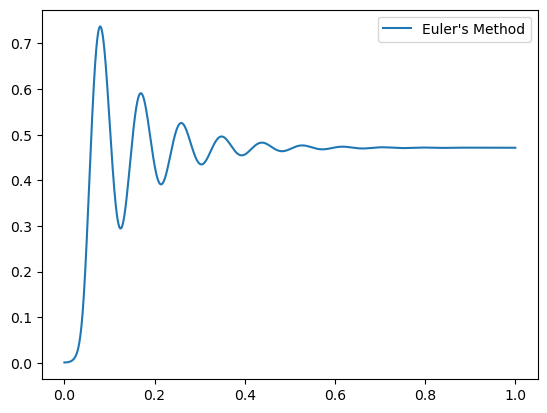

In [14]:
# Changing the value of mu
mu = (10)**(-5)

t0 = 0
tf = 1
N = 2000

t = np.linspace(t0,tf,N)
theta = np.zeros(len(t))
theta[0] = 0.001 # Initial value theta(0)
dtheta = np.zeros(len(t))
dtheta[0] = 0 # Initial value theta'(0)
f = lambda t, theta, dtheta: (-mu*dtheta + tau(theta))/I # Function for y'' = f(t,y,y')
for n in range(len(t)-1):
    theta[n+1] = theta[n] + dtheta[n]*(t[n+1] - t[n])
    dtheta[n+1] = dtheta[n] + f(t[n],theta[n],dtheta[n])*(t[n+1] - t[n])

plt.plot(t, theta, label = "Euler's Method")
plt.legend()
plt.show()

Plot of the approximate solutions with a decreased $\mu$ between the original $\mu$ and the $\mu$ given in the project document to observe the change; $\mu = 10^{-4.8}$:

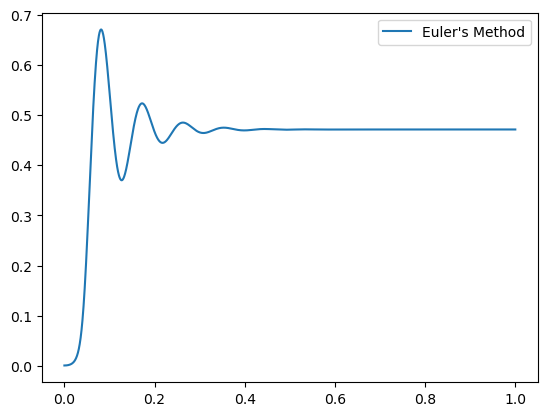

In [15]:
# Changing the value of mu
mu = (10)**(-4.8)

t0 = 0
tf = 1
N = 2000

t = np.linspace(t0,tf,N)
theta = np.zeros(len(t))
theta[0] = 0.001 # Initial value theta(0)
dtheta = np.zeros(len(t))
dtheta[0] = 0 # Initial value theta'(0)
f = lambda t, theta, dtheta: (-mu*dtheta + tau(theta))/I # Function for y'' = f(t,y,y')
for n in range(len(t)-1):
    theta[n+1] = theta[n] + dtheta[n]*(t[n+1] - t[n])
    dtheta[n+1] = dtheta[n] + f(t[n],theta[n],dtheta[n])*(t[n+1] - t[n])

plt.plot(t, theta, label = "Euler's Method")
plt.legend()
plt.show()

Plot of the approximate solutions with another (more) decreased $\mu$ given in the project document $\mu = 10^{-5.5}$:

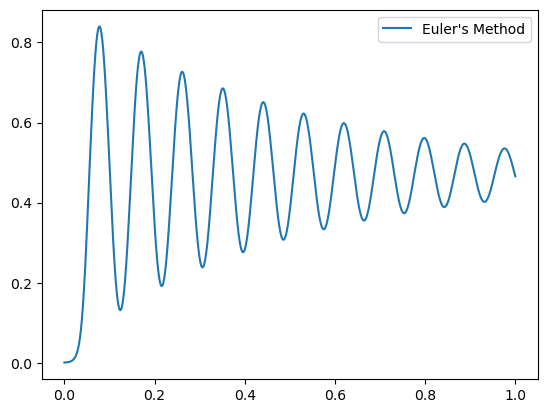

In [16]:
# Changing the value of mu
mu = (10)**(-5.5)

t0 = 0
tf = 1
N = 2000

t = np.linspace(t0,tf,N)
theta = np.zeros(len(t))
theta[0] = 0.001 # Initial value theta(0)
dtheta = np.zeros(len(t))
dtheta[0] = 0 # Initial value theta'(0)
f = lambda t, theta, dtheta: (-mu*dtheta + tau(theta))/I # Function for y'' = f(t,y,y')
for n in range(len(t)-1):
    theta[n+1] = theta[n] + dtheta[n]*(t[n+1] - t[n])
    dtheta[n+1] = dtheta[n] + f(t[n],theta[n],dtheta[n])*(t[n+1] - t[n])

plt.plot(t, theta, label = "Euler's Method")
plt.legend()
plt.show()

From the plot above, we see that decreasing the $\mu$, which is the damping coefficient, lowers the resistance and  allows more oscillation, therefore changing the steady states.

## Optional Challenge - Flipping the Switch
*(an attempt)*

If someone starts form the steady state and apply a horizontal force at $t = 0$ and very gradually increase the force until $t = 3$, assuming that the resulting torque on the lever is:
$$
\tau_{app} = -T_0 t \cos(\theta), T_0 = \frac{1}{2000}
$$
We compute the solution for at least 5s using Euler's method:

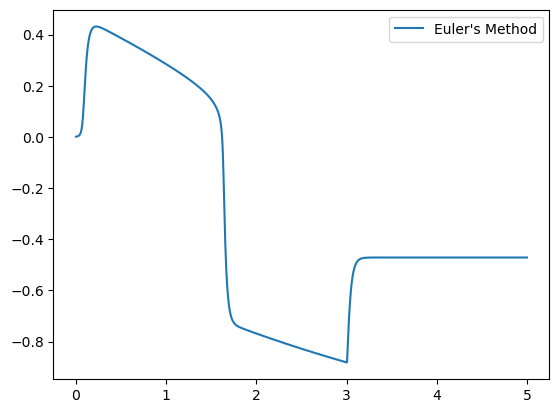

In [17]:
T0 = 1/2000
def tauApp(t, theta):
    if t <= 3:
        return -T0*t*np.cos(theta)
    return 0

# Changing the mu value back to the given value
mu = (10)**(-4)

t0 = 0
tf = 5
N = 2000

t = np.linspace(t0,tf,N)
theta = np.zeros(len(t))
theta[0] = 0.001 # Initial value theta(0)
dtheta = np.zeros(len(t))
dtheta[0] = 0 # Initial value theta'(0)
f = lambda t, theta, dtheta: (-mu*dtheta + tau(theta) + tauApp(t, theta))/I # Function for y'' = f(t,y,y')
for n in range(len(t)-1):
    theta[n+1] = theta[n] + dtheta[n]*(t[n+1] - t[n])
    dtheta[n+1] = dtheta[n] + f(t[n],theta[n],dtheta[n])*(t[n+1] - t[n])

plt.plot(t, theta, label = "Euler's Method")
plt.legend()
plt.show()